##PROYECTO 2

### GRUPO
###Almirón, Sebastián
###Fernández, Santino
###Infante, Sebastián



---


###PARTE 2

###### MODELO DE PREDICCIÓN
###### REGRESIÓN LINEAL MÚLTIPLE - PRECIOS DE GAS NATURAL
###### Dataset: precios-de-gas-natural-.csv
###### Target (Y): precio_distribuidora
###### Features (X): precio_gnc, precio_usina, precio_industria


El dataset analizado corresponde a una serie histórica de precios de gas natural en Argentina, publicada a nivel oficial.

Cada fila del conjunto de datos representa la información de un período mensual para una determinada cuenca productora (por ejemplo, Austral Santa Cruz, Neuquina, Golfo de San Jorge, entre otras) y un tipo de contrato (como firme, interrumpible o total).

Para cada combinación de cuenca, contrato y fecha, se registran diversos precios del gas asociados a distintos segmentos del mercado:
precio_distribuidora: precio que paga la distribuidora de gas.
precio_gnc: precio vinculado al gas natural comprimido (GNC) utilizado como combustible vehicular.
precio_usina: precio aplicado a usinas o centrales eléctricas.
precio_industria: precio correspondiente a usuarios industriales.
precio_otros: otros segmentos específicos.
precio_ppp: precio en el punto de ingreso al sistema de transporte (PPP) o precio de referencia regulado.
precio_expo: precio de exportación de gas.
Además, el dataset incluye variables temporales (anio, mes,fecha) y categóricas (cuenca, contrato) que permiten contextualizar los precios en el tiempo y el espacio.

En este proyecto, se toma como variable objetivo (Y) el precio_distribuidora, ya que representa el precio que enfrentan las distribuidoras de gas, y se utilizan como features (X) tres variables numéricas relacionadas con otros segmentos de demanda: precio_gnc, precio_usina y precio_industria.

El objetivo es evaluar en qué medida estos precios explican o predicen el nivel del precio_distribuidora mediante un modelo de Regresión Lineal Múltiple.

Fuente: http://datos.energia.gob.ar/dataset/precios-de-gas-natural/archivo/d87ca6ab-2979-474b-994a-e4ba259bb217

## EJERCICIO 1
### CARGA DE DATOS Y VISUALIZACION DE VARIABLES

In [40]:
# Montaje del dataset
from google.colab import drive
drive.mount('/content/drive')

input_folder = "/content/drive/MyDrive/Proyecto2/Proyecto_Parte2/"

df_original = pd.read_csv(input_folder + "precios-de-gas-natural.csv")
df = df_original.copy()
print("\nDataset cargado con éxito")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset cargado con éxito



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_pub                1458 non-null   int64  
 1   anio                  1458 non-null   int64  
 2   mes                   1458 non-null   int64  
 3   cuenca                1458 non-null   object 
 4   contrato              1458 non-null   object 
 5   precio_distribuidora  1458 non-null   float64
 6   precio_gnc            1458 non-null   float64
 7   precio_usina          1458 non-null   float64
 8   precio_industria      1458 non-null   float64
 9   precio_otros          1458 non-null   float64
 10  precio_ppp            1458 non-null   float64
 11  precio_expo           1458 non-null   float64
 12  indice_tiempo         1458 non-null   object 
 13  fecha                 1458 non-null   object 
dtypes: float64(7), int64(3), object(4)
memory usag

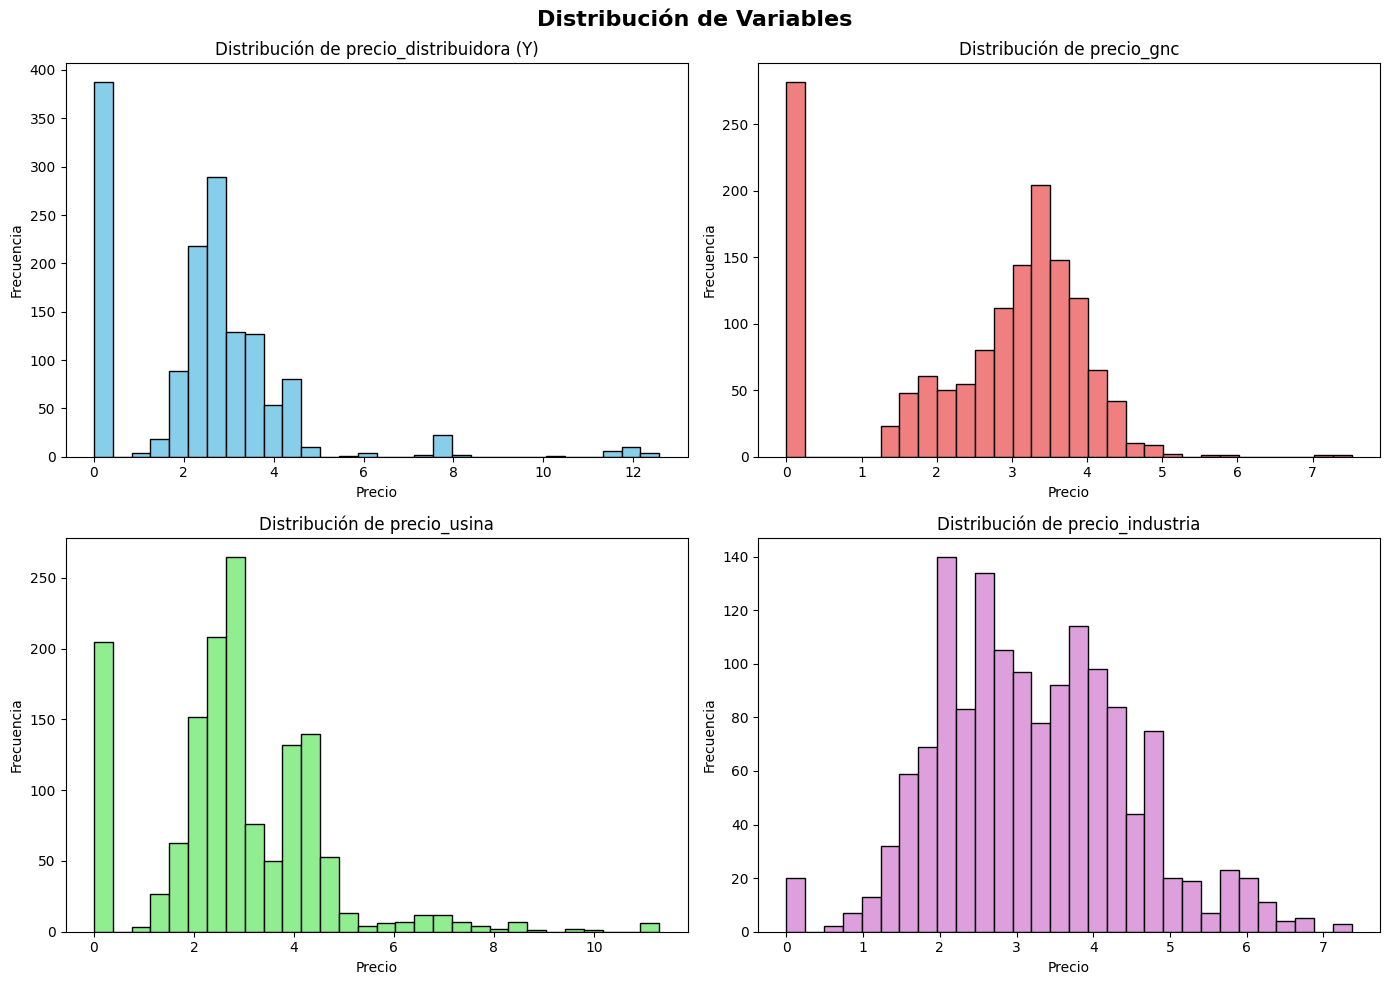


Matriz de Correlación:
                      precio_gnc  precio_usina  precio_industria  \
precio_gnc              1.000000      0.238037          0.303894   
precio_usina            0.238037      1.000000          0.352706   
precio_industria        0.303894      0.352706          1.000000   
precio_distribuidora    0.403629      0.194116          0.127051   

                      precio_distribuidora  
precio_gnc                        0.403629  
precio_usina                      0.194116  
precio_industria                  0.127051  
precio_distribuidora              1.000000  


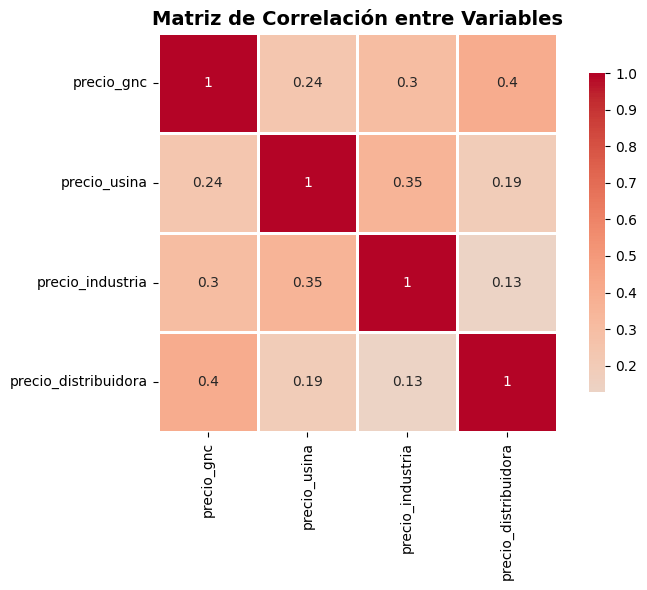

In [41]:
# Import de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carga de datos
print("\nInformación del dataset:")
print(df.info())
print("\nPrimeras filas:")
print(df.head(10))
print("\nEstadísticas descriptivas:")
print(df.describe())

# Definir features y target
features = ['precio_gnc', 'precio_usina', 'precio_industria']
target = 'precio_distribuidora'
cols_to_use = features + [target]

# Verificar valores nulos
print(f"\nValores nulos en las columnas seleccionadas:")
print(df[cols_to_use].isnull().sum())

# Eliminar filas con valores nulos
df_clean = df[cols_to_use].dropna()
print(f"\nFilas después de eliminar nulos: {len(df_clean)} (original: {len(df)})")

# Visualizaciones - Histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables', fontsize=16, fontweight='bold')

axes[0, 0].hist(df_clean['precio_distribuidora'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de precio_distribuidora (Y)')
axes[0, 0].set_xlabel('Precio')
axes[0, 0].set_ylabel('Frecuencia')

axes[0, 1].hist(df_clean['precio_gnc'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribución de precio_gnc')
axes[0, 1].set_xlabel('Precio')
axes[0, 1].set_ylabel('Frecuencia')

axes[1, 0].hist(df_clean['precio_usina'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribución de precio_usina')
axes[1, 0].set_xlabel('Precio')
axes[1, 0].set_ylabel('Frecuencia')

axes[1, 1].hist(df_clean['precio_industria'], bins=30, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribución de precio_industria')
axes[1, 1].set_xlabel('Precio')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\nMatriz de Correlación:")
correlation_matrix = df_clean[cols_to_use].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## EJERCICIO 2
### CAMBIO DE ESTRUCTURA DE DATOS A MATRICIAL

In [42]:
X = df_clean[features].values
y = df_clean[target].values

print(f"\nForma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")
print(f"\nPrimeras 5 filas de X:")
print(X[:5])
print(f"\nPrimeros 5 valores de y:")
print(y[:5])


Forma de X (features): (1458, 3)
Forma de y (target): (1458,)

Primeras 5 filas de X:
[[3.43 3.1  3.27]
 [3.54 2.29 2.38]
 [3.44 2.65 3.13]
 [3.33 3.3  3.39]
 [0.   2.33 2.28]]

Primeros 5 valores de y:
[3.56 3.04 3.4  3.66 3.43]


## EJERCICIO 3
### PARTICIONADO DE DATOS EN ENTRENAMIENTO Y TEST

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de test: {X_test.shape[0]} muestras")
print(f"\nProporción: {X_train.shape[0]/len(X)*100:.1f}% train / {X_test.shape[0]/len(X)*100:.1f}% test")


Tamaño del conjunto de entrenamiento: 1166 muestras
Tamaño del conjunto de test: 292 muestras

Proporción: 80.0% train / 20.0% test


## EJERCICIO 4
### GENERACIÓN DEL MODELO CON LOS DATOS DE ENTRENAMIENTO

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModelo entrenado exitosamente!")
print(f"\nIntercepto (β₀): {model.intercept_:.4f}")
print(f"\nCoeficientes (β₁, β₂, β₃):")
for i, feature in enumerate(features):
    print(f"{feature}: {model.coef_[i]:.4f}")

# Tabla de coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model.coef_,
    'Coeficiente_Abs': np.abs(model.coef_)
}).sort_values('Coeficiente_Abs', ascending=False)

print("\nTabla de coeficientes ordenados por importancia:")
print(coef_df.to_string(index=False))
print(f"\nLa variable más influyente es: {coef_df.iloc[0]['Feature']}")


Modelo entrenado exitosamente!

Intercepto (β₀): 0.7862

Coeficientes (β₁, β₂, β₃):
precio_gnc: 0.5526
precio_usina: 0.1218
precio_industria: -0.0604

Tabla de coeficientes ordenados por importancia:
         Feature  Coeficiente  Coeficiente_Abs
      precio_gnc     0.552553         0.552553
    precio_usina     0.121754         0.121754
precio_industria    -0.060361         0.060361

La variable más influyente es: precio_gnc


## EJERCICIO 5
### EVALUACIÓN DEL MODELO CON LOS DATOS DE ENTRENAMIENTO


Métricas en conjunto de ENTRENAMIENTO:
R² (coeficiente de determinación): 0.1729
MSE (Error Cuadrático Medio): 3.3791
RMSE (Raíz del Error Cuadrático Medio): 1.8382
MAE (Error Absoluto Medio): 1.2374

El modelo explica el 17.29% de la varianza en entrenamiento


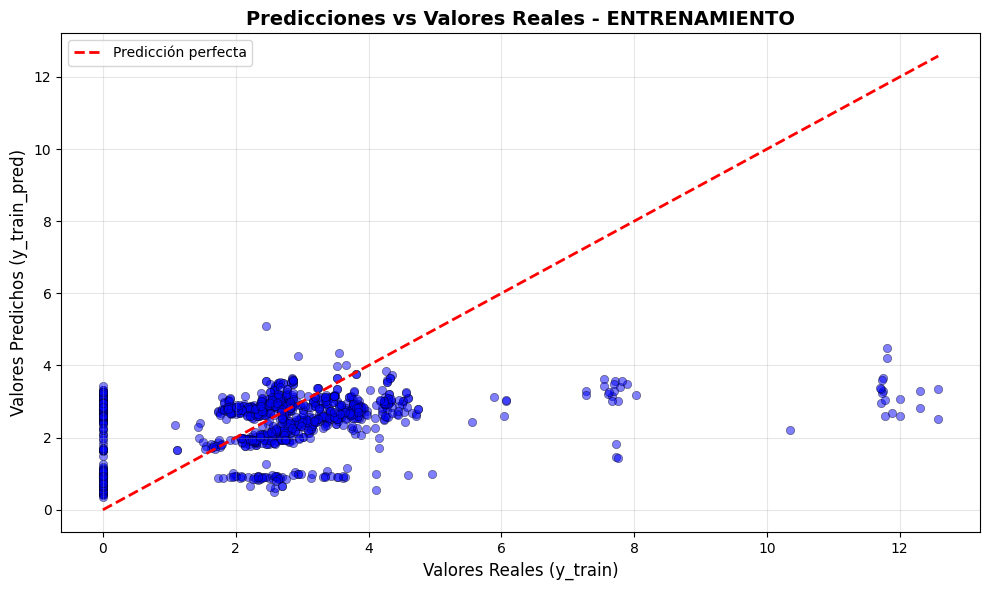

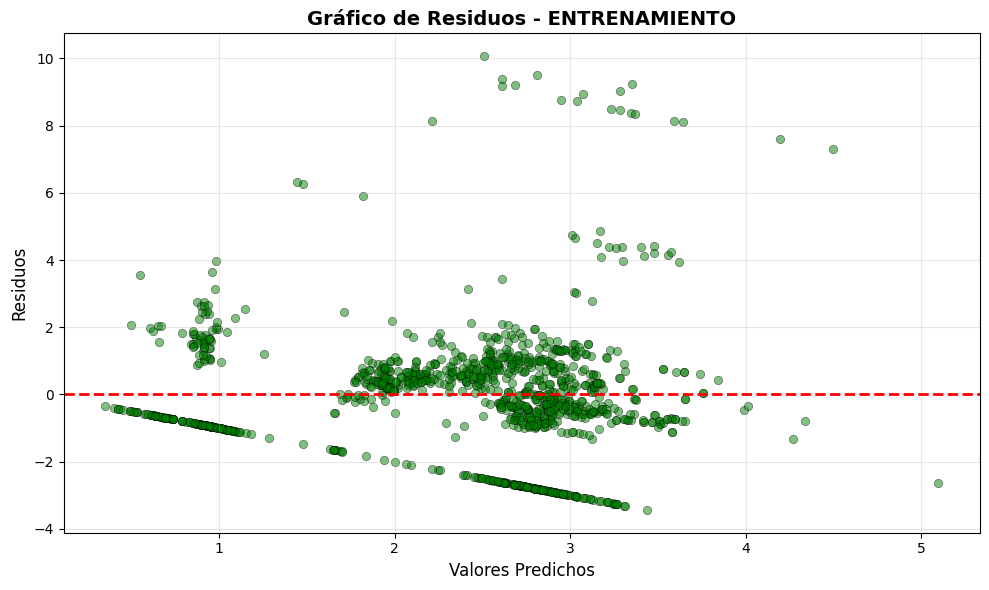

In [45]:
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nMétricas en conjunto de ENTRENAMIENTO:")
print(f"R² (coeficiente de determinación): {r2_train:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_train:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_train:.4f}")
print(f"MAE (Error Absoluto Medio): {mae_train:.4f}")
print(f"\nEl modelo explica el {r2_train*100:.2f}% de la varianza en entrenamiento")

# Gráfico predicciones vs reales (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', edgecolors='k', linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Valores Reales (y_train)', fontsize=12)
plt.ylabel('Valores Predichos (y_train_pred)', fontsize=12)
plt.title('Predicciones vs Valores Reales - ENTRENAMIENTO', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de residuos (Train)
residuos_train = y_train - y_train_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuos_train, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Gráfico de Residuos - ENTRENAMIENTO', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## EJERCICIO 6
### EVALUACIÓN DEL MODELO CON LOS DATOS DE TEST


Métricas en conjunto de TEST:
R² (coeficiente de determinación): 0.1752
MSE (Error Cuadrático Medio): 2.6616
RMSE (Raíz del Error Cuadrático Medio): 1.6315
MAE (Error Absoluto Medio): 1.1159

El modelo explica el 17.52% de la varianza en test


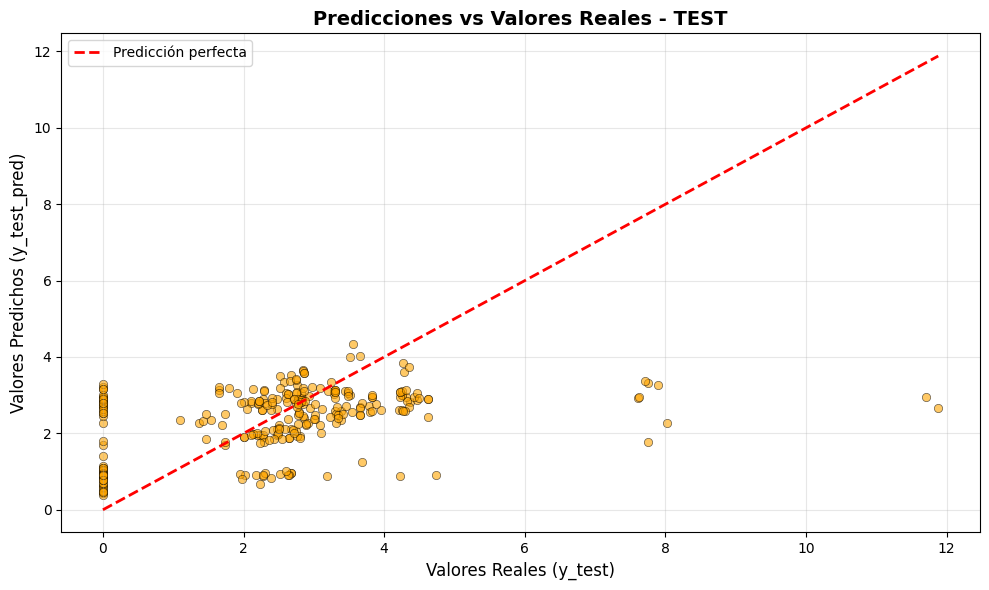

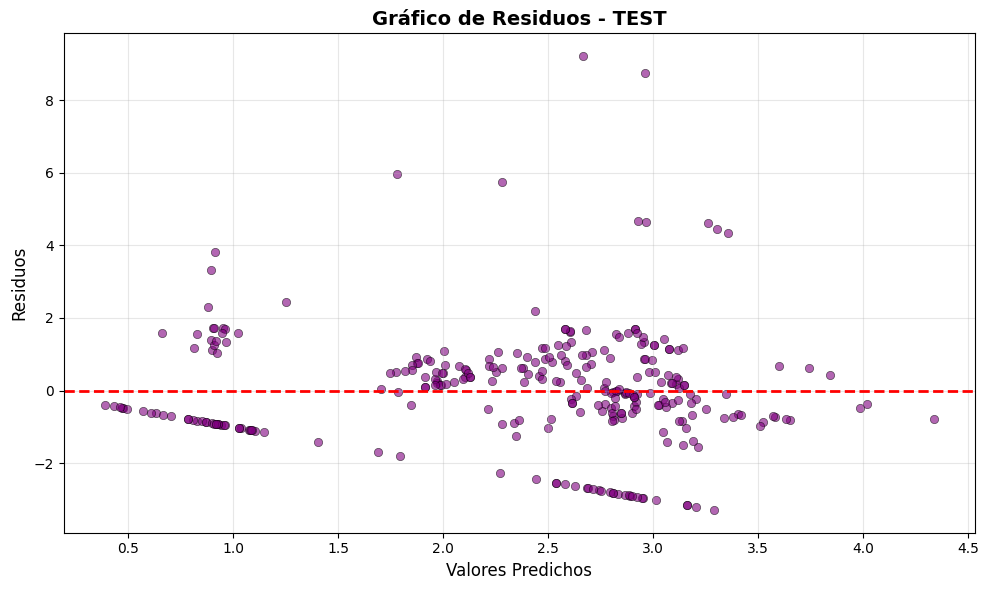

In [46]:
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nMétricas en conjunto de TEST:")
print(f"R² (coeficiente de determinación): {r2_test:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_test:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_test:.4f}")
print(f"MAE (Error Absoluto Medio): {mae_test:.4f}")
print(f"\nEl modelo explica el {r2_test*100:.2f}% de la varianza en test")

# Gráfico predicciones vs reales (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Valores Reales (y_test)', fontsize=12)
plt.ylabel('Valores Predichos (y_test_pred)', fontsize=12)
plt.title('Predicciones vs Valores Reales - TEST', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de residuos (Test)
residuos_test = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuos_test, alpha=0.6, color='purple', edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Gráfico de Residuos - TEST', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### COMPARATIVA DE RESULTADOS DE EVALUACIÓN DEL MODELO CON LOS DATOS DE ENTRENAMIENTO Y DE TEST


Tabla Comparativa:
Métrica  Entrenamiento     Test  Diferencia
     R²       0.172882 0.175243   -0.002361
    MSE       3.379138 2.661638    0.717500
   RMSE       1.838243 1.631453    0.206790
    MAE       1.237418 1.115946    0.121472


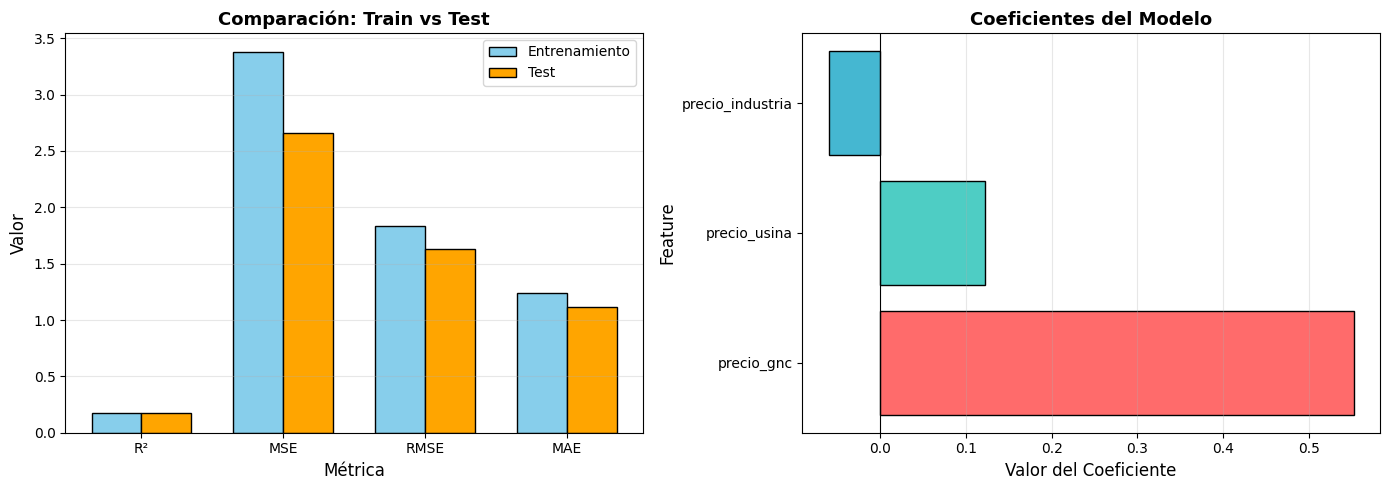

In [47]:
comparativa = pd.DataFrame({
    'Métrica': ['R²', 'MSE', 'RMSE', 'MAE'],
    'Entrenamiento': [r2_train, mse_train, rmse_train, mae_train],
    'Test': [r2_test, mse_test, rmse_test, mae_test],
    'Diferencia': [r2_train - r2_test, mse_train - mse_test,
                   rmse_train - rmse_test, mae_train - mae_test]})

print("\nTabla Comparativa:")
print(comparativa.to_string(index=False))

# Gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics_names = ['R²', 'MSE', 'RMSE', 'MAE']
train_values = [r2_train, mse_train, rmse_train, mae_train]
test_values = [r2_test, mse_test, rmse_test, mae_test]

x = np.arange(len(metrics_names))
width = 0.35

axes[0].bar(x - width/2, train_values, width, label='Entrenamiento',
            color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, test_values, width, label='Test',
            color='orange', edgecolor='black')
axes[0].set_xlabel('Métrica', fontsize=12)
axes[0].set_ylabel('Valor', fontsize=12)
axes[0].set_title('Comparación: Train vs Test', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_names)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].barh(features, model.coef_, color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
             edgecolor='black')
axes[1].set_xlabel('Valor del Coeficiente', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)
axes[1].set_title('Coeficientes del Modelo', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()